In [2]:
%load_ext autoreload
%autoreload 2
import wandb

from wandb_utils import *

api = wandb.Api()

project = 'romeu/NeRF2D'

sweep = api.sweep(f'{project}/n01pj3hs')
sweep_runs = [api.run(f'{project}/{run.id}') for run in sweep.runs]

In [3]:
runs = [RunWrapper(run) for run in sweep.runs]

In [14]:
runs_cube_depth = [run for run in runs if run.run.config['data.artifact'] == 'bunny:latest'
                   and run.run.config['model.use_depth_supervision'] == False
                   # and run.run.config['camera_subset'] == True
                   and run.run.state == 'finished']

runs_cube_depth = sorted(runs_cube_depth, key=lambda r: r.run.config['camera_subset_n'])

100%|██████████| 1/1 [00:00<00:00, 1469.62it/s]


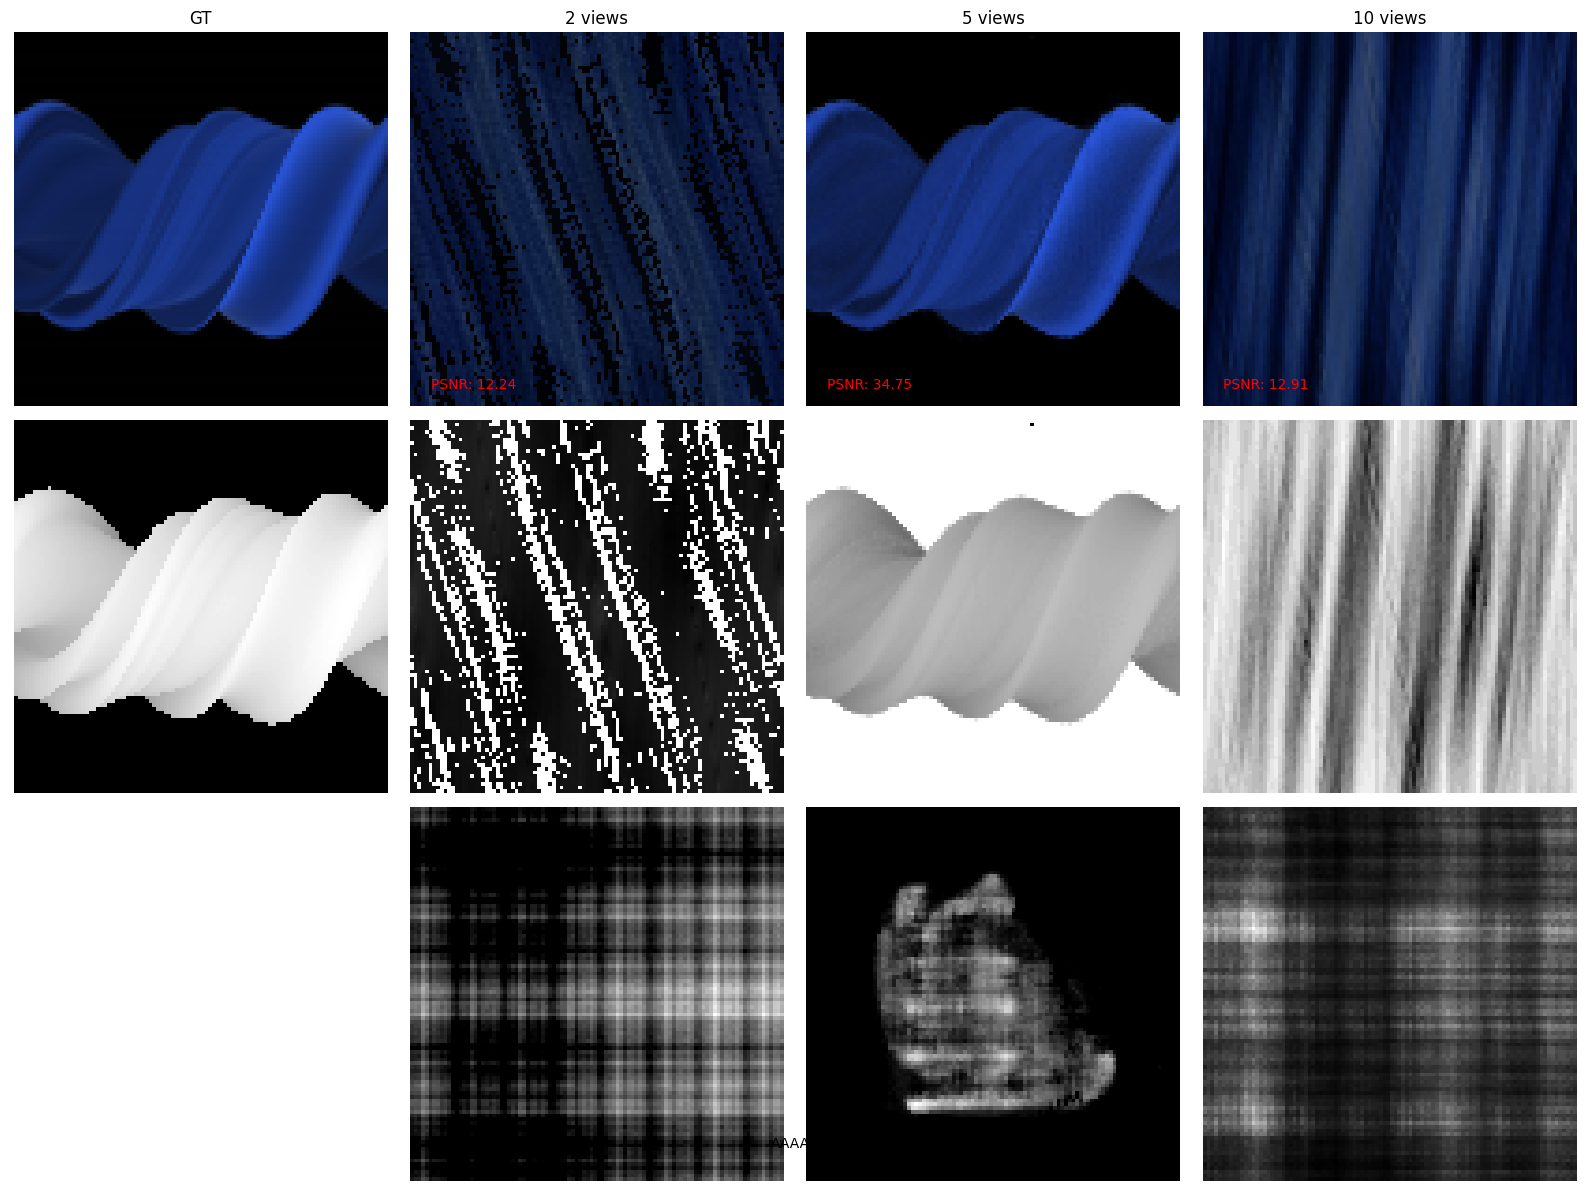

In [15]:
from visualizations.figures import compare_runs

manager = RunDataManager(Path('../run_data'))

compare_runs(
    runs_cube_depth,
    manager,
    with_gt=True,
    with_depth=True,
    with_density=True,
    show_psnr=True,
    title_fun=lambda r: f'{r.run.config['camera_subset_n']} views'
)